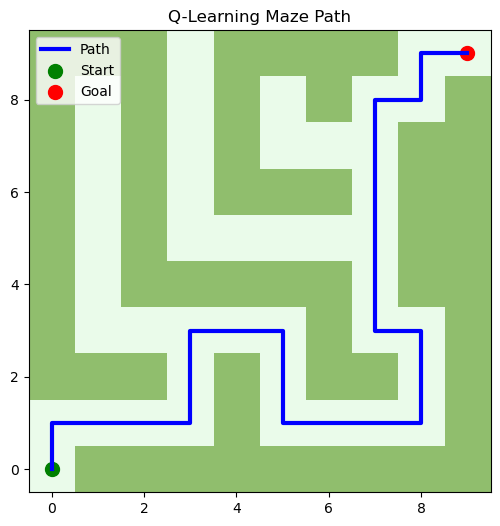

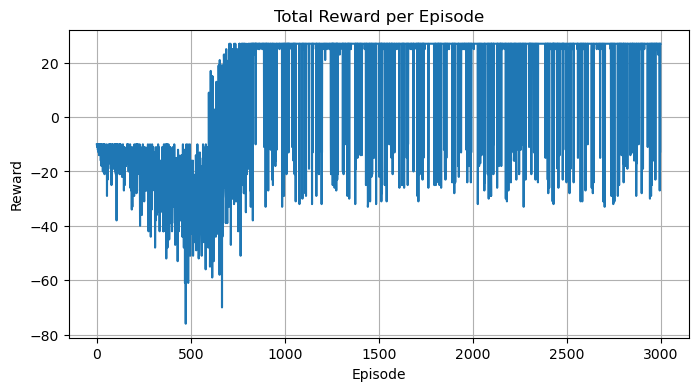

In [7]:
# -----------------------------
# RL Maze Navigation using Q-Learning
# -----------------------------

import numpy as np                   # For numerical operations and arrays
import matplotlib.pyplot as plt      # For plotting graphs and maze path
from matplotlib.colors import ListedColormap  # To define custom maze colors

# -----------------------------
# Maze Layout (0 = free cell, 1 = wall)
# -----------------------------
maze = np.array([
 [0,1,1,1,1,1,1,1,1,1],             # Row 0: only first cell free
 [0,0,0,0,1,0,0,0,0,1],             # Row 1: multiple free cells
 [1,1,1,0,1,0,1,1,0,1],             # Row 2: few paths
 [1,0,0,0,0,0,1,0,0,1],             # Row 3: open passage
 [1,0,1,1,1,1,1,0,1,1],             # Row 4: some walls
 [1,0,1,0,0,0,0,0,1,1],             # Row 5: path continues
 [1,0,1,0,1,1,1,0,1,1],             # Row 6
 [1,0,1,0,1,0,0,0,1,1],             # Row 7
 [1,0,1,0,1,0,1,0,0,1],             # Row 8
 [1,1,1,0,1,1,1,1,0,0]              # Row 9: goal is bottom-right
])

start = (0, 0)   # Starting position (top-left corner)
goal = (9, 9)    # Goal position (bottom-right corner)

# -----------------------------
# RL Parameters
# -----------------------------
episodes = 3000       # Total number of learning episodes
alpha = 0.1           # Learning rate - how fast we update knowledge
gamma = 0.9           # Discount factor - how much future rewards matter
epsilon = 0.5         # Exploration rate - chance to pick random move

# Possible moves: left, right, up, down
actions = [(0,-1), (0,1), (-1,0), (1,0)]

# Initialize Q-table with zeros (for each state and action)
Q = np.zeros(maze.shape + (len(actions),))

# Reward values for each situation
r_wall = -10           # Penalty for hitting a wall
r_goal = 50            # Reward for reaching the goal
r_step = -1            # Small penalty for each step to encourage shorter path

# -----------------------------
# Function: Check if position is valid
# -----------------------------
def valid(s):
    r, c = s                              # Split state into row and column
    return 0 <= r < maze.shape[0] and 0 <= c < maze.shape[1] and maze[r, c] == 0
    # Return True if inside maze boundaries and cell is free (0)

# -----------------------------
# Function: Choose action using ε-greedy
# -----------------------------
def act(s):
    if np.random.rand() < epsilon:         # With probability ε, pick random action (explore)
        return np.random.randint(len(actions))
    return np.argmax(Q[s])                 # Otherwise, pick best known action (exploit)

# -----------------------------
# Q-Learning Training Loop
# -----------------------------
rewards = []                               # To record total reward per episode

for ep in range(episodes):                 # Repeat for many episodes
    s = start                              # Start each episode from the starting point
    total = 0                              # Total reward for this episode
    done = False                           # Flag to stop when goal reached or hit wall

    while not done:                        # Continue until the episode ends
        a = act(s)                         # Choose an action (ε-greedy)
        n = (s[0] + actions[a][0], s[1] + actions[a][1])  # Compute next position

        # -----------------------------
        # Determine Reward and Episode End Condition
        # -----------------------------
        if not valid(n):                   # If next move is invalid (hit wall)
            r = r_wall                     # Apply wall penalty
            done = True                    # End this episode
        elif n == goal:                    # If goal reached
            r = r_goal                     # Give goal reward
            done = True                    # End episode
        else:
            r = r_step                     # Normal step penalty (keep moving)

        # -----------------------------
        # Q-Learning Formula (Update)
        # -----------------------------
        old = Q[s][a]                      # Get old Q-value
        next_max = np.max(Q[n]) if valid(n) else 0  # Max future Q-value
        Q[s][a] = old + alpha * (r + gamma * next_max - old)  # Update rule

        s = n                              # Move to next state
        total += r                         # Add reward to total

    epsilon = max(0.01, epsilon * 0.995)   # Slowly reduce exploration rate
    rewards.append(total)                  # Store total reward for this episode

# -----------------------------
# Derive Best Path after Training
# -----------------------------
path = [start]                             # List to store best path
s = start
for _ in range(200):                       # Limit steps to avoid infinite loop
    if s == goal: break                    # Stop when goal reached
    a = np.argmax(Q[s])                    # Choose best action from Q-table
    n = (s[0] + actions[a][0], s[1] + actions[a][1])  # Next position
    if not valid(n) or n in path: break    # Stop if invalid move or loop detected
    path.append(n)                         # Add step to path
    s = n

# -----------------------------
# Function: Display Maze and Path
# -----------------------------
def show_path():
    cmap = ListedColormap(['#eafbea', '#90be6d'])     # Define colors for maze
    plt.figure(figsize=(6,6))                         # Set plot size
    plt.imshow(maze, cmap=cmap)                       # Show maze
    rows, cols = zip(*path)                           # Split path into coordinates
    plt.plot(cols, rows, color='blue', linewidth=3, label='Path')  # Draw path line
    plt.scatter(start[1], start[0], c='green', s=100, label='Start')  # Mark start
    plt.scatter(goal[1], goal[0], c='red', s=100, label='Goal')       # Mark goal
    plt.title("Q-Learning Maze Path")                  # Title for plot
    plt.gca().invert_yaxis()                           # Invert Y for proper orientation
    plt.legend()                                       # Add legend
    plt.show()                                         # Display figure

# Call the function to visualize learned path
show_path()

# -----------------------------
# Plot Reward per Episode (Training Curve)
# -----------------------------
plt.figure(figsize=(8,4))               # Set figure size
plt.plot(rewards)                       # Plot rewards
plt.title("Total Reward per Episode")   # Graph title
plt.xlabel("Episode")                   # X-axis label
plt.ylabel("Reward")                    # Y-axis label
plt.grid()                              # Add grid for clarity
plt.show()                              # Display the reward plot
